<h1> 11장 데이터 다루기 </h1>

In [3]:
import pandas as pd
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])


데이터를 잘 파악하는 것이 딥러닝을 다루는 기술의 1단계!<br>
그러므로 데이터 시각화 라이브러리 panda를 사용해 데이터를 불러옴(피마 인디언 당뇨병과 관련된 속성)

In [4]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


임신 횟수와 당뇨병 발병 확률의 상관 계수를 알기 위해 이렇게 계산!<br>
먼저 groupby 함수를 사용해 'pregnant' 정보를 기준으로 하는 새 그룹을 만들고 <br>
as_index=False로 pregnant 정보 옆에 새로운 index를 만들어 줌.<br>
mean 함수를 사용해 평균을 구하고 sort_values 함수를 써서 pregnant 칼럼을 오름차순으로 정리!


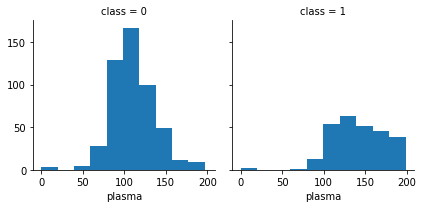

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

이 그래프를 통해 당뇨병 환자인 경우(class = 1) plasma 항목의 수치가 150 이상인 경우가 많다는 것을 알 수 있음!<br>
이렇게 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정의 한 예시!

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

dataset = numpy.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim= 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y, epochs=200, batch_size=10)

print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

C:\Users\Dong Hwa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/200
768/768 [==============================] - 0s 431us/step - loss: 2.4313 - acc: 0.5143
Epoch 2/200
768/768 [==============================] - 0s 74us/step - loss: 0.9145 - acc: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 71us/step - loss: 0.7940 - acc: 0.6406
Epoch 4/200
768/768 [==============================] - 0s 75us/step - loss: 0.7408 - acc: 0.6068
Epoch 5/200
768/768 [==============================] - 0s 74us/step - loss: 0.6790 - acc: 0.6432
Epoch 6/200
768/768 [==============================] - 0s 73us/step - loss: 0.6498 - acc: 0.6263
Epoch 7/200
768/768 [==============================] - 0s 75us/step - loss: 0.6375 - acc: 0.6497
Epoch 8/200
768/768 [==============================] - 0s 71us/step - loss: 0.6390 - acc: 0.6289
Epoch 9/200
768/768 [==============================] - 0s 75us/step - loss: 0.6295 - acc: 0.6328
Epoch 10/200
768/768 [==============================] - 0s 71us/step - loss: 0.6214 - acc: 0.6497
Epoch 11/200
768/768 [======

768/768 [==============================] - 0s 62us/step - loss: 0.5035 - acc: 0.7435
Epoch 85/200
768/768 [==============================] - 0s 68us/step - loss: 0.5045 - acc: 0.7448
Epoch 86/200
768/768 [==============================] - 0s 66us/step - loss: 0.5112 - acc: 0.7539
Epoch 87/200
768/768 [==============================] - 0s 62us/step - loss: 0.5088 - acc: 0.7435
Epoch 88/200
768/768 [==============================] - 0s 66us/step - loss: 0.5101 - acc: 0.7409
Epoch 89/200
768/768 [==============================] - 0s 70us/step - loss: 0.5060 - acc: 0.7617
Epoch 90/200
768/768 [==============================] - 0s 66us/step - loss: 0.5018 - acc: 0.7500
Epoch 91/200
768/768 [==============================] - 0s 71us/step - loss: 0.5010 - acc: 0.7513
Epoch 92/200
768/768 [==============================] - 0s 68us/step - loss: 0.5085 - acc: 0.7370
Epoch 93/200
768/768 [==============================] - 0s 71us/step - loss: 0.4997 - acc: 0.7591
Epoch 94/200
768/768 [===========

768/768 [==============================] - 0s 64us/step - loss: 0.4764 - acc: 0.7487
Epoch 168/200
768/768 [==============================] - 0s 65us/step - loss: 0.4657 - acc: 0.7682
Epoch 169/200
768/768 [==============================] - 0s 64us/step - loss: 0.4746 - acc: 0.7656
Epoch 170/200
768/768 [==============================] - 0s 62us/step - loss: 0.4691 - acc: 0.7695
Epoch 171/200
768/768 [==============================] - 0s 65us/step - loss: 0.4708 - acc: 0.7734
Epoch 172/200
768/768 [==============================] - 0s 61us/step - loss: 0.4682 - acc: 0.7721
Epoch 173/200
768/768 [==============================] - 0s 62us/step - loss: 0.4744 - acc: 0.7695
Epoch 174/200
768/768 [==============================] - 0s 62us/step - loss: 0.4683 - acc: 0.7734
Epoch 175/200
768/768 [==============================] - 0s 62us/step - loss: 0.4702 - acc: 0.7617
Epoch 176/200
768/768 [==============================] - 0s 64us/step - loss: 0.4703 - acc: 0.7721
Epoch 177/200
768/768 [=

77.7%의 예측 정확도를 보인다!